In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format',lambda x:'%.2f' %x)

In [3]:
df = pd.read_csv("Medicare_data - 2022.csv", skiprows =1)

print("Dataset_shape:", df.shape)
df.head()

Dataset_shape: (145742, 15)


,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_City,Rndrng_Prvdr_St,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,DRG_Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt
0,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.00,Metropolitan area core: primary flow within an...,23,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,25,158541.64,37331.00,35332.96
1,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.00,Metropolitan area core: primary flow within an...,24,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,18,107085.33,25842.67,23857.94
2,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.00,Metropolitan area core: primary flow within an...,25,CRANIOTOMY AND ENDOVASCULAR INTRACRANIAL PROCE...,18,156326.78,32167.89,27662.94
3,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.00,Metropolitan area core: primary flow within an...,38,EXTRACRANIAL PROCEDURES WITH CC,19,112085.26,11568.47,9993.47
4,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.00,Metropolitan area core: primary flow within an...,39,EXTRACRANIAL PROCEDURES WITHOUT CC/MCC,33,89068.21,8199.82,6086.39


In [12]:
df = pd.read_csv("Medicare_data - 2022.csv", skiprows=1)


In [13]:
df.columns = df.columns.str.replace(r'\s+', '_', regex=True).str.strip().str.lower()


In [14]:
df.columns.tolist()


['rndrng_prvdr_ccn',
 'rndrng_prvdr_org_name',
 'rndrng_prvdr_city',
 'rndrng_prvdr_st',
 'rndrng_prvdr_state_fips',
 'rndrng_prvdr_zip5',
 'rndrng_prvdr_state_abrvtn',
 'rndrng_prvdr_ruca',
 'rndrng_prvdr_ruca_desc',
 'drg_cd',
 'drg_desc',
 'tot_dschrgs',
 'avg_submtd_cvrd_chrg',
 'avg_tot_pymt_amt',
 'avg_mdcr_pymt_amt']

In [15]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145742 entries, 0 to 145741
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   rndrng_prvdr_ccn           145742 non-null  int64  
 1   rndrng_prvdr_org_name      145742 non-null  object 
 2   rndrng_prvdr_city          145742 non-null  object 
 3   rndrng_prvdr_st            145742 non-null  object 
 4   rndrng_prvdr_state_fips    145742 non-null  int64  
 5   rndrng_prvdr_zip5          145742 non-null  int64  
 6   rndrng_prvdr_state_abrvtn  145742 non-null  object 
 7   rndrng_prvdr_ruca          145065 non-null  float64
 8   rndrng_prvdr_ruca_desc     145065 non-null  object 
 9   drg_cd                     145742 non-null  int64  
 10  drg_desc                   145742 non-null  object 
 11  tot_dschrgs                145742 non-null  int64  
 12  avg_submtd_cvrd_chrg       145742 non-null  float64
 13  avg_tot_pymt_amt           14

,rndrng_prvdr_ccn,rndrng_prvdr_state_fips,rndrng_prvdr_zip5,rndrng_prvdr_ruca,drg_cd,tot_dschrgs,avg_submtd_cvrd_chrg,avg_tot_pymt_amt,avg_mdcr_pymt_amt
count,145742.00,145742.00,145742.00,145065.00,145742.00,145742.00,145742.00,145742.00,145742.00
mean,254173.51,27.79,47684.34,1.74,420.57,34.37,87243.43,18505.73,15419.60
std,153060.61,15.52,28609.64,6.09,252.36,50.31,112054.83,21141.22,18504.73
min,10001.00,1.00,1040.00,1.00,1.00,11.00,3433.33,1065.09,144.50
25%,110005.00,13.00,24073.00,1.00,219.00,14.00,34243.37,8489.11,6659.84
50%,240080.00,27.00,44106.00,1.00,377.00,20.00,56725.30,12735.30,10486.85
75%,380018.00,41.00,73701.00,1.00,639.00,35.00,99931.10,20450.06,16988.00
max,670309.00,56.00,99801.00,99.00,988.00,2750.00,9709952.36,747038.73,660248.65


In [16]:
for col in df.columns:
    print(f"\nUnique values in {col}:", df[col].nunique())


Unique values in rndrng_prvdr_ccn: 3015

Unique values in rndrng_prvdr_org_name: 2942

Unique values in rndrng_prvdr_city: 1836

Unique values in rndrng_prvdr_st: 3006

Unique values in rndrng_prvdr_state_fips: 51

Unique values in rndrng_prvdr_zip5: 2782

Unique values in rndrng_prvdr_state_abrvtn: 51

Unique values in rndrng_prvdr_ruca: 17

Unique values in rndrng_prvdr_ruca_desc: 14

Unique values in drg_cd: 533

Unique values in drg_desc: 518

Unique values in tot_dschrgs: 661

Unique values in avg_submtd_cvrd_chrg: 145203

Unique values in avg_tot_pymt_amt: 142682

Unique values in avg_mdcr_pymt_amt: 142540


In [19]:
#Analysis
# Top 10 DRG-'Diagnosis-Related Group codes' (used for medical billing)

top_drg = df['drg_cd'].value_counts().head(10)
print("Top 10 Most Common DRG Codes:")
print(top_drg)

Top 10 Most Common DRG Codes:
drg_cd
177    2768
871    2713
291    2677
193    2448
872    2222
189    2060
690    2039
682    2007
683    1997
392    1930
Name: count, dtype: int64


In [22]:
top_drg_codes = top_drg.index.tolist()
top_drg_info = df[df['drg_cd'].isin(top_drg_codes)][['drg_cd','drg_desc']].drop_duplicates()
top_drg_info = top_drg_info.set_index('drg_cd').loc[top_drg.index]
print("DRG Code Descriptions (Top 10):")
print(top_drg_)

DRG Code Descriptions (Top 10):
                                                 drg_desc
drg_cd                                                   
177     RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC
871     SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOU...
291                      HEART FAILURE AND SHOCK WITH MCC
193                SIMPLE PNEUMONIA AND PLEURISY WITH MCC
872     SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOU...
189               PULMONARY EDEMA AND RESPIRATORY FAILURE
690       KIDNEY AND URINARY TRACT INFECTIONS WITHOUT MCC
682                                RENAL FAILURE WITH MCC
683                                 RENAL FAILURE WITH CC
392     ESOPHAGITIS, GASTROENTERITIS AND MISCELLANEOUS...


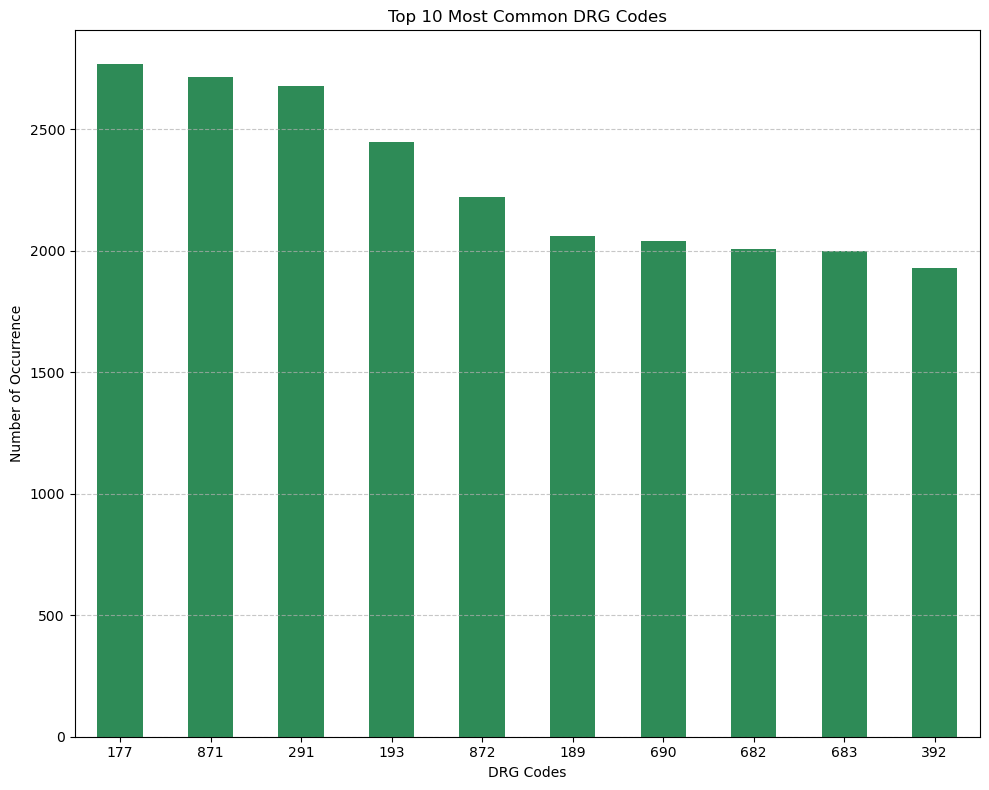

In [46]:
import matplotlib.pyplot as plt
import os 

os.makedirs("Healthcare-Cost-Analysis-US-Medicare", exist_ok=True)


plt.figure(figsize=(10, 8))
top_drg.plot(kind='bar', color='seagreen')
plt.title("Top 10 Most Common DRG Codes")
plt.xlabel("DRG Codes")
plt.ylabel("Number of Occurrence")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.savefig("top_10_drg_codes.png")
plt.show()


#Most Expensive DRG Codes (Based on Average Medicare Payment)

In [39]:
top_costly_drg = df.groupby('drg_cd')['avg_mdcr_pymt_amt'].mean().sort_values(ascending = False).head(10)  # group

top_costly_codes = top_costly_drg.index.tolist()  #top DRG codes
top_costly_info = df[df['drg_cd'].isin(top_costly_codes)][['drg_cd', 'drg_desc']].drop_duplicates()   #Match these codes with their descriptions

top_costly_info = top_costly_info.set_index('drg_cd').loc[top_costly_drg.index]

top_costly_final = pd.concat([top_costly_info, top_costly_drg], axis=1) # to combine payment data and descriptions
top_costly_final.columns = ['drg_desc','avg_mdcr_pymt_amt']

top_costly_final



,drg_desc,avg_mdcr_pymt_amt
drg_cd,,
18,CHIMERIC ANTIGEN RECEPTOR (CAR) T-CELL AND OTH...,390284.77
1,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...,294892.18
3,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,178418.79
7,LUNG TRANSPLANT,128039.63
14,ALLOGENEIC BONE MARROW TRANSPLANT,118226.80
5,LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...,116098.86
4,TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DI...,113872.73
20,INTRACRANIAL VASCULAR PROCEDURES WITH PRINCIPA...,94832.90
814,RETICULOENDOTHELIAL AND IMMUNITY DISORDERS WIT...,91797.89


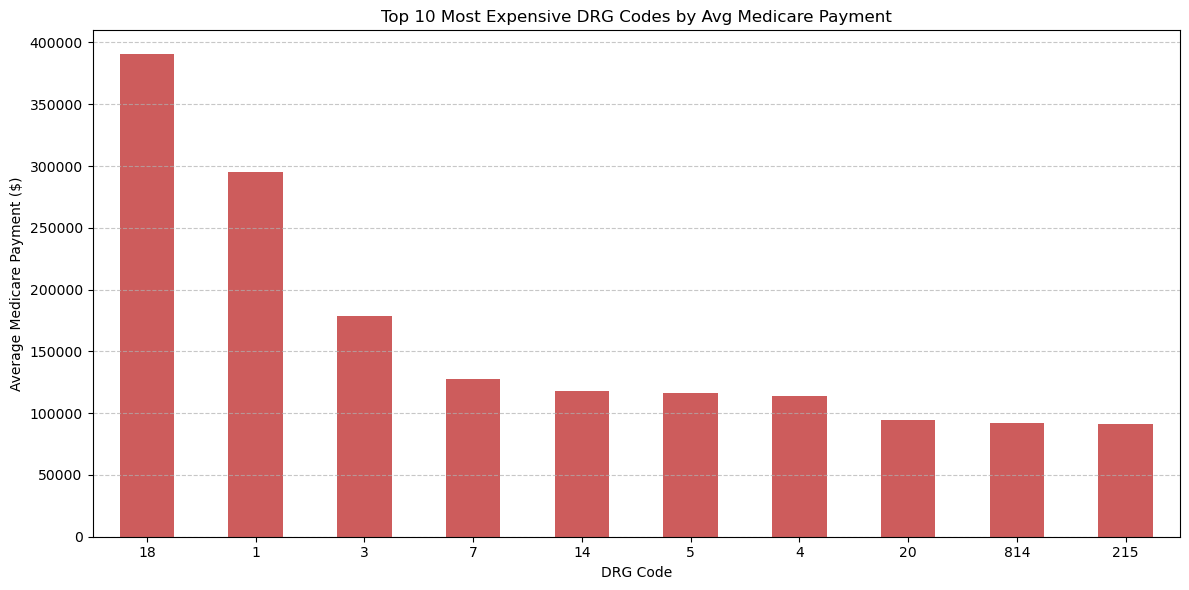

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
top_costly_final['avg_mdcr_pymt_amt'].plot(kind = 'bar',color = 'indianred')

plt.title("Top 10 Most Expensive DRG Codes by Avg Medicare Payment")
plt.xlabel("DRG Code")
plt.ylabel("Average Medicare Payment ($)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle = '--', alpha = 0.7)

plt.savefig("top_10_costly_drg_codes.png")

plt.tight_layout()

#Outlier Detection in Medicare Payment Amounts
DRG codes where the average Medicare payment is much higher or lower than normal, which could signal:
Extremely costly treatments 
Billing anomalies 
Rare medical cases 

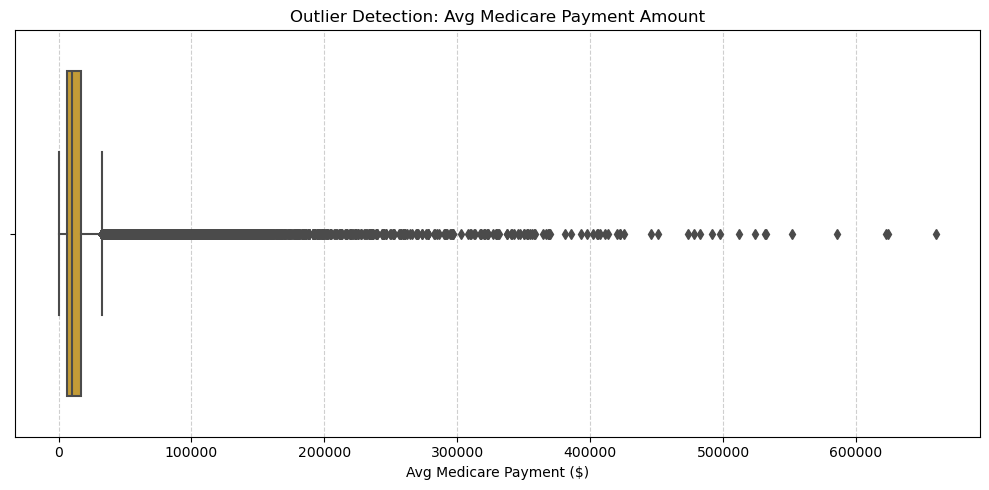

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# outliers in avg_mdcr_pymt_amt
sns.boxplot(x=df['avg_mdcr_pymt_amt'], color='goldenrod')

plt.title("Outlier Detection: Avg Medicare Payment Amount")
plt.xlabel("Avg Medicare Payment ($)")
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()

plt.savefig("avg_med_payment_outliers.png")

plt.show()


In [53]:
#outlier threshold based on 99 percentile

outlier_threshold = df['avg_mdcr_pymt_amt'].quantile(0.99)
print("Outlier threshold(99th percentile):", outlier_threshold)

Outlier threshold(99th percentile): 77220.15266109991


In [55]:
outlier_df = df[df['avg_mdcr_pymt_amt']> outlier_threshold]  #Filter all DRG rows where avg payment > threshold
outlier_df[['drg_cd', 'drg_desc', 'avg_mdcr_pymt_amt']].sort_values(by = 'avg_mdcr_pymt_amt', ascending = False).head(10) 
#top 10 most expensive medical procedures

,drg_cd,drg_desc,avg_mdcr_pymt_amt
71631,18,CHIMERIC ANTIGEN RECEPTOR (CAR) T-CELL AND OTH...,660248.65
114333,18,CHIMERIC ANTIGEN RECEPTOR (CAR) T-CELL AND OTH...,624208.60
49855,469,MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTA...,622214.31
19147,1,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...,585761.27
22422,18,CHIMERIC ANTIGEN RECEPTOR (CAR) T-CELL AND OTH...,552015.82
7775,18,CHIMERIC ANTIGEN RECEPTOR (CAR) T-CELL AND OTH...,532418.35
10270,18,CHIMERIC ANTIGEN RECEPTOR (CAR) T-CELL AND OTH...,531690.08
4835,18,CHIMERIC ANTIGEN RECEPTOR (CAR) T-CELL AND OTH...,523952.60
5937,18,CHIMERIC ANTIGEN RECEPTOR (CAR) T-CELL AND OTH...,511923.85
15968,3,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,497296.32


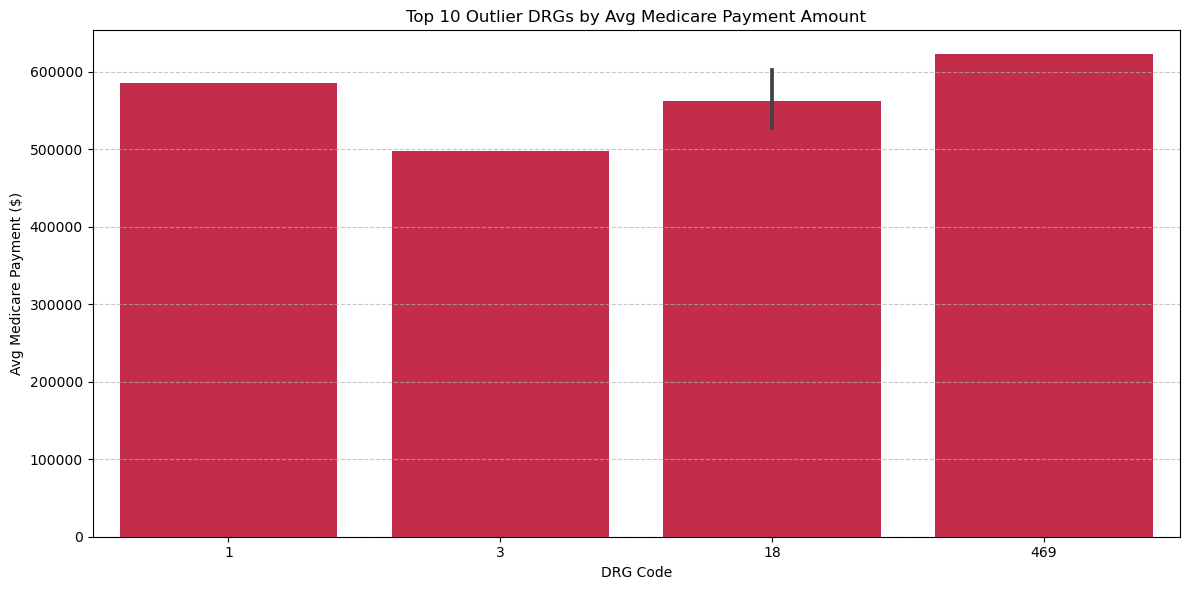

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame for top 10 outliers sorted by highest average Medicare payment
top_outliers = outlier_df[['drg_cd', 'drg_desc', 'avg_mdcr_pymt_amt']].sort_values(
    by='avg_mdcr_pymt_amt', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_outliers,
    x='drg_cd',
    y='avg_mdcr_pymt_amt',
    color='crimson')

plt.title("Top 10 Outlier DRGs by Avg Medicare Payment Amount")
plt.xlabel("DRG Code")
plt.ylabel("Avg Medicare Payment ($)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("avg_mdcr_outlier_top10.png")
plt.show()


In [66]:
top_outliers = outlier_df[['drg_cd', 'drg_desc', 'avg_mdcr_pymt_amt']]\
    .sort_values(by='avg_mdcr_pymt_amt', ascending=False)\
    .drop_duplicates(subset='drg_cd')\
    .head(10)

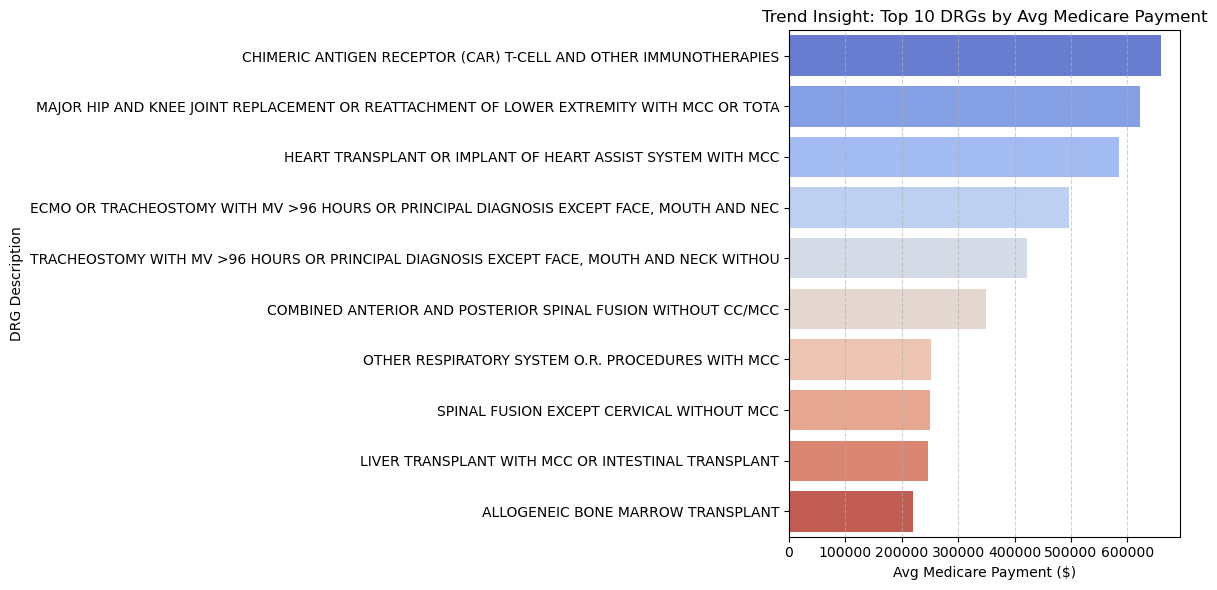

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

sns.barplot(
    data= top_outliers,
    y= 'drg_desc',
    x= 'avg_mdcr_pymt_amt',
    palette = 'coolwarm')
plt.title("Trend Insight: Top 10 DRGs by Avg Medicare Payment")
plt.xlabel("Avg Medicare Payment ($)")
plt.ylabel("DRG Description")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("avg_payment_trend_drg.png")
plt.show()